**Weather Data Simulation**

- Generate synthetic daily temperature & rainfall data for 1 year using NumPy.
- Put it into a Pandas DataFrame (`Date`, `Temperature`, `Rainfall`).
- Find hottest/coldest day, average rainfall, rolling 7-day temperature mean.
- Plot: line chart for temperature trend, scatter plot for rainfall vs. temperature.


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
dates_array = np.arange(np.datetime64('2025-01-01'),np.datetime64('2026-01-01'))
days = len(dates_array)
temperatures_array = np.random.uniform(low=16.0,high=25.0,size=days, )
rainfalls_array = np.random.uniform(low=0.0,high=100.0,size=days, )

In [81]:
df = pd.DataFrame(dict(Date=dates_array,Temperature=temperatures_array,Rainfall=rainfalls_array))

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype        
---  ------       --------------  -----        
 0   Date         365 non-null    datetime64[s]
 1   Temperature  365 non-null    float64      
 2   Rainfall     365 non-null    float64      
dtypes: datetime64[s](1), float64(2)
memory usage: 8.7 KB


In [83]:
hottest_day = df.loc[df["Temperature"] ==df["Temperature"].max()]
coldest_day = df.loc[df["Temperature"] ==df["Temperature"].min()]

In [84]:
print(hottest_day,coldest_day)

          Date  Temperature   Rainfall
151 2025-06-01    24.977326  86.824144           Date  Temperature   Rainfall
338 2025-12-05    16.005604  62.960785


In [85]:
avg_rainfall = df["Rainfall"].mean()
avg_rainfall

np.float64(49.27167880272911)

In [86]:
df['Temp_7day'] = df['Temperature'].rolling(7).mean() 
df['Temp_7day'].tail(14)

351    20.180116
352    21.022778
353    20.913605
354    20.338244
355    20.772154
356    20.866934
357    20.668136
358    20.679657
359    20.097685
360    21.035821
361    21.111350
362    20.319585
363    20.272764
364    19.721129
Name: Temp_7day, dtype: float64

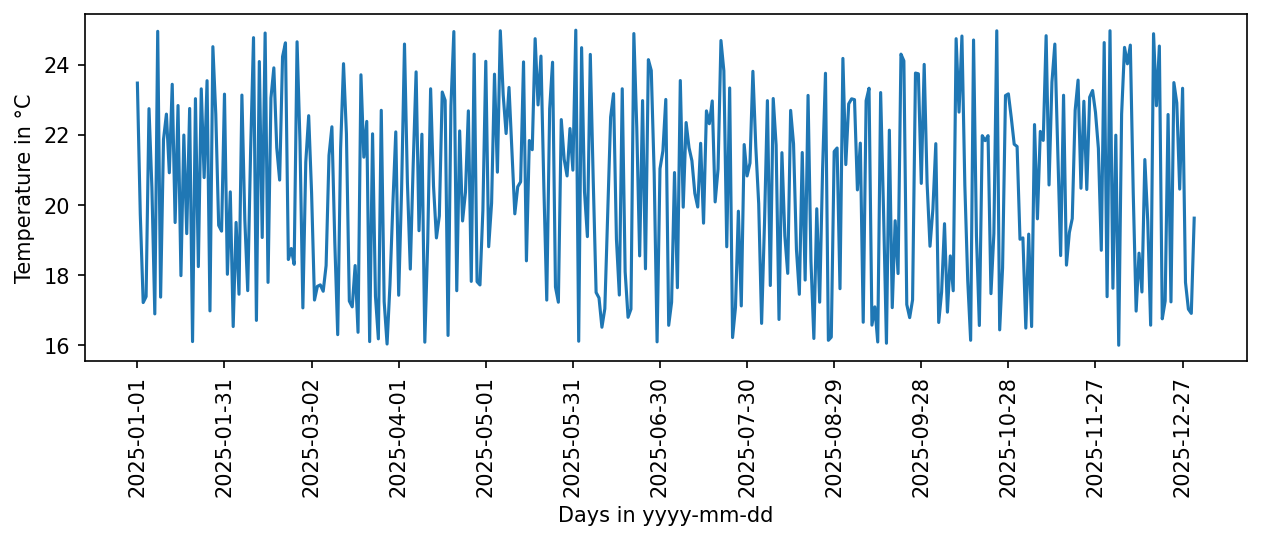

In [87]:
plt.figure(figsize=(10,3),dpi=150)
plt.plot(df.Date,df.Temperature)

plt.xticks(df.Date[::30],rotation=90)
plt.xlabel("Days in yyyy-mm-dd")
plt.ylabel("Temperature in °C")
plt.show()

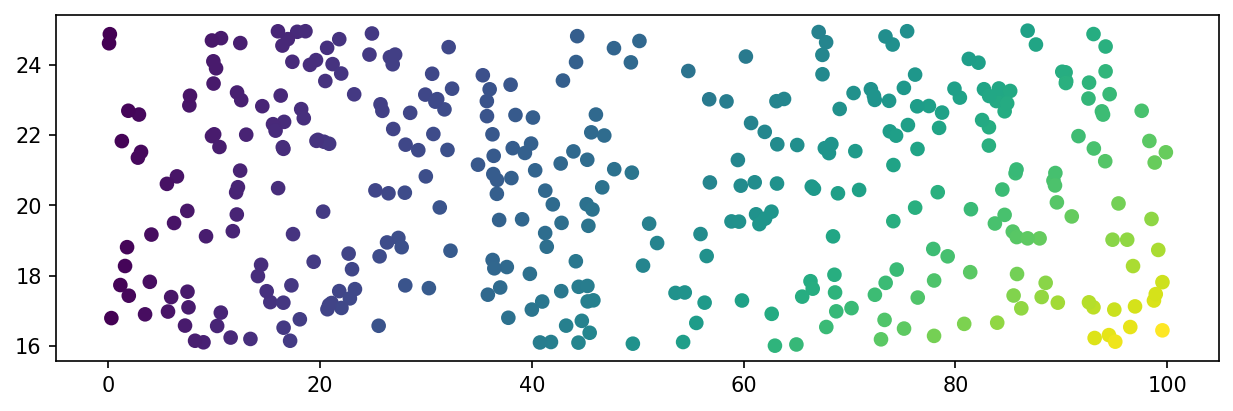

In [88]:
plt.figure(figsize=(10,3),dpi=150)

plt.scatter(df.Rainfall,df.Temperature,c=df.Rainfall/df.Temperature)
plt.show()

